In [1]:
# Tabla de datos

import pandas as pd
import os

dataBol=pd.read_excel(os.path.join('data','dataBolivia_indicadores.xlsx'))
dataBol.head()

,DEPARTAMENTO,PROVINCIA,TOTAL_VIVIENDAS,TAMAÑO_PROMEDIO_DEL_HOGAR,PORCENTAJE_DE_VIVIENDAS_PROPIAS,PORCENTAJE_DE_VIVIENDAS_CON_AGUA_DE_CAÑERIA,PORCENTAJE_ DE_VIVIENDAS_CON_ENERGIA_ELECTRICA,PERSONAS_CON_DIFICULTADES_PERMANENTES
0,CHUQUISACA,Oropeza,77376,3.62,61.44,78.590,87.08,10829
1,CHUQUISACA,Azurduy,5956,4.11,89.46,40.446,27.50,983
2,CHUQUISACA,Zudáñez,9116,4.21,88.20,55.400,48.96,1156
3,CHUQUISACA,Tomina,9217,3.77,83.24,65.430,46.23,1640
4,CHUQUISACA,Hernando Siles,8158,3.84,73.42,70.230,63.67,1554


In [2]:
# Mapa

os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

dataBolmap=gpd.read_file(os.path.join('maps','Provincias.zip'))

dataBolmap.head()

,id,c_ut,DEPARTAMEN,PROVINCIA,geometry
0,0,0313,Cochabamba,Mizque,"POLYGON ((-65.61829 -17.67455, -65.59538 -17.6..."
1,1,0701,Santa Cruz,Andrés Ibáñez,"POLYGON ((-62.97381 -18.02444, -63.08615 -18.0..."
2,2,0409,Oruro,Sabaya,"POLYGON ((-68.47194 -19.35205, -68.47718 -19.3..."
3,3,0501,Potosí,Tomás Frías,"POLYGON ((-65.87315 -18.97139, -65.86752 -18.9..."
4,4,0404,Oruro,Sajama,"POLYGON ((-68.47914 -18.61758, -68.48010 -18.6..."


In [3]:
# Preprocessing
capitalizeColumns=lambda x: x.str.upper().str.strip()
dataBol[['DEPARTAMENTO','PROVINCIA']]=dataBol[['DEPARTAMENTO','PROVINCIA']].apply(capitalizeColumns)
dataBolmap[['DEPARTAMEN','PROVINCIA']]=dataBolmap[['DEPARTAMEN','PROVINCIA']].apply(capitalizeColumns)

In [4]:
import unidecode

byePunctuation=lambda x: unidecode.unidecode(x)
dataBol[['DEPARTAMENTO','PROVINCIA']]=dataBol[['DEPARTAMENTO','PROVINCIA']].applymap(byePunctuation)
dataBolmap[['DEPARTAMEN','PROVINCIA']]=dataBolmap[['DEPARTAMEN','PROVINCIA']].applymap(byePunctuation)

In [5]:
len(dataBol.PROVINCIA),len(dataBolmap.PROVINCIA)

(112, 112)

In [6]:
dataBol.PROVINCIA.duplicated().sum(),dataBolmap.PROVINCIA.duplicated().sum()

(3, 3)

In [7]:
# concatenating

dataBol['provDist']=["+".join(pd) for pd in zip (dataBol.DEPARTAMENTO,dataBol.PROVINCIA)]
dataBolmap['provDist']=["+".join(pd) for pd in zip (dataBolmap.DEPARTAMEN,dataBolmap.PROVINCIA)]

In [8]:
# the new column looks like this:

dataBol['provDist'].head()

0           CHUQUISACA+OROPEZA
1           CHUQUISACA+AZURDUY
2           CHUQUISACA+ZUDANEZ
3            CHUQUISACA+TOMINA
4    CHUQUISACA+HERNANDO SILES
Name: provDist, dtype: object

In [9]:
# replacing dashes and multiple spaces by a simple space

dataBol.provDist=dataBol.provDist.str.replace("\-|\_|\s+"," ",regex=True)
dataBolmap.provDist=dataBolmap.provDist.str.replace("\-|\_|\s+"," ",regex=True)

In [10]:
dataBol

,DEPARTAMENTO,PROVINCIA,TOTAL_VIVIENDAS,TAMAÑO_PROMEDIO_DEL_HOGAR,PORCENTAJE_DE_VIVIENDAS_PROPIAS,PORCENTAJE_DE_VIVIENDAS_CON_AGUA_DE_CAÑERIA,PORCENTAJE_ DE_VIVIENDAS_CON_ENERGIA_ELECTRICA,PERSONAS_CON_DIFICULTADES_PERMANENTES,provDist
0,CHUQUISACA,OROPEZA,77376,3.62,61.44,78.590,87.08,10829,CHUQUISACA+OROPEZA
1,CHUQUISACA,AZURDUY,5956,4.11,89.46,40.446,27.50,983,CHUQUISACA+AZURDUY
2,CHUQUISACA,ZUDANEZ,9116,4.21,88.20,55.400,48.96,1156,CHUQUISACA+ZUDANEZ
3,CHUQUISACA,TOMINA,9217,3.77,83.24,65.430,46.23,1640,CHUQUISACA+TOMINA
4,CHUQUISACA,HERNANDO SILES,8158,3.84,73.42,70.230,63.67,1554,CHUQUISACA+HERNANDO SILES
...,...,...,...,...,...,...,...,...,...
107,PANDO,NICOLAS SUAREZ,15448,3.68,65.18,60.230,86.21,1888,PANDO+NICOLAS SUAREZ
108,PANDO,MANURIPI,3420,4.14,76.32,23.040,55.00,277,PANDO+MANURIPI
109,PANDO,MADRE DE DIOS,4021,5.66,82.91,2.060,41.13,362,PANDO+MADRE DE DIOS
110,PANDO,ABUNA,955,3.98,81.05,16.750,64.40,87,PANDO+ABUNA


In [11]:
dataBolmap

,id,c_ut,DEPARTAMEN,PROVINCIA,geometry,provDist
0,0,0313,COCHABAMBA,MIZQUE,"POLYGON ((-65.61829 -17.67455, -65.59538 -17.6...",COCHABAMBA+MIZQUE
1,1,0701,SANTA CRUZ,ANDRES IBANEZ,"POLYGON ((-62.97381 -18.02444, -63.08615 -18.0...",SANTA CRUZ+ANDRES IBANEZ
2,2,0409,ORURO,SABAYA,"POLYGON ((-68.47194 -19.35205, -68.47718 -19.3...",ORURO+SABAYA
3,3,0501,POTOSI,TOMAS FRIAS,"POLYGON ((-65.87315 -18.97139, -65.86752 -18.9...",POTOSI+TOMAS FRIAS
4,4,0404,ORURO,SAJAMA,"POLYGON ((-68.47914 -18.61758, -68.48010 -18.6...",ORURO+SAJAMA
...,...,...,...,...,...,...
107,107,0803,BENI,GENERAL JOSE BALLIVIAN,"POLYGON ((-66.26304 -12.00437, -66.26249 -12.0...",BENI+GENERAL JOSE BALLIVIAN
108,108,0603,TARIJA,GRAN CHACO,"POLYGON ((-63.69855 -21.39569, -63.69823 -21.3...",TARIJA+GRAN CHACO
109,109,0405,ORURO,LITORAL,"POLYGON ((-67.93301 -18.83585, -67.92465 -18.8...",ORURO+LITORAL
110,110,0219,LA PAZ,GENERAL JOSE MANUEL PANDO,"POLYGON ((-69.46790 -17.41525, -69.46917 -17.3...",LA PAZ+GENERAL JOSE MANUEL PANDO


In [12]:
# EJERCICIO: 1

In [13]:
nomatch_df=set(dataBol.provDist)- set(dataBolmap.provDist)
nomatch_gdf=set(dataBolmap.provDist)-set(dataBol.provDist) 

In [14]:
len(nomatch_df), len(nomatch_gdf)

(10, 10)

In [15]:
# pick the closest match from nomatch_gdf for a value in nomatch_df

from thefuzz import process

[(dis,process.extractOne(dis,nomatch_gdf)) for dis in sorted(nomatch_df)]

[('BENI+JOSE BALLIVIAN', ('BENI+GENERAL JOSE BALLIVIAN', 95)),
 ('CHUQUISACA+SUD CINTI', ('CHUQUISACA+SUR CINTI', 95)),
 ('COCHABAMBA+ESTEBAN ARCE', ('COCHABAMBA+ESTEBAN ARZE', 96)),
 ('LA PAZ+JOSE MANUEL PANDO', ('LA PAZ+GENERAL JOSE MANUEL PANDO', 95)),
 ('POTOSI+BERNARDINO BILBAO RIOJA', ('POTOSI+SUR LIPEZ', 86)),
 ('POTOSI+SUD CHICHAS', ('POTOSI+SUR CHICHAS', 94)),
 ('POTOSI+SUD LIPEZ', ('POTOSI+SUR LIPEZ', 94)),
 ('SANTA CRUZ+OBISPO SANTISTEVAN', ('SANTA CRUZ+OBISPO SANTISTEBAN', 97)),
 ('TARIJA+ANICETO ARCE', ('TARIJA+ARCE', 86)),
 ("TARIJA+BURNET O'CONNOR", ("TARIJA+O'CONNOR", 95))]

In [16]:
# is this OK?

{dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

{'BENI+JOSE BALLIVIAN': 'BENI+GENERAL JOSE BALLIVIAN',
 'CHUQUISACA+SUD CINTI': 'CHUQUISACA+SUR CINTI',
 'COCHABAMBA+ESTEBAN ARCE': 'COCHABAMBA+ESTEBAN ARZE',
 'LA PAZ+JOSE MANUEL PANDO': 'LA PAZ+GENERAL JOSE MANUEL PANDO',
 'POTOSI+BERNARDINO BILBAO RIOJA': 'POTOSI+SUR LIPEZ',
 'POTOSI+SUD CHICHAS': 'POTOSI+SUR CHICHAS',
 'POTOSI+SUD LIPEZ': 'POTOSI+SUR LIPEZ',
 'SANTA CRUZ+OBISPO SANTISTEVAN': 'SANTA CRUZ+OBISPO SANTISTEBAN',
 'TARIJA+ANICETO ARCE': 'TARIJA+ARCE',
 "TARIJA+BURNET O'CONNOR": "TARIJA+O'CONNOR"}

In [17]:
# then:

changes_df={dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

In [18]:
# Now, make the replacements:

dataBol.provDist.replace(changes_df,inplace=True)

In [19]:
# Now the merge can happen:

dataBolmap=dataBolmap.merge(dataBol, on='provDist')

In [20]:
# check

dataBolmap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   id                                              112 non-null    int64   
 1   c_ut                                            112 non-null    object  
 2   DEPARTAMEN                                      112 non-null    object  
 3   PROVINCIA_x                                     112 non-null    object  
 4   geometry                                        112 non-null    geometry
 5   provDist                                        112 non-null    object  
 6   DEPARTAMENTO                                    112 non-null    object  
 7   PROVINCIA_y                                     112 non-null    object  
 8   TOTAL_VIVIENDAS                                 112 non-null    int64   
 9   TAMAÑO_PROMEDIO_DEL_HOGA

In [21]:
# We can get rid of some columns:

bye=['id','c_ut','DEPARTAMENTO', 'PROVINCIA_y']
dataBolmap.drop(columns=bye,inplace=True)

# keeping
dataBolmap.head()

,DEPARTAMEN,PROVINCIA_x,geometry,provDist,TOTAL_VIVIENDAS,TAMAÑO_PROMEDIO_DEL_HOGAR,PORCENTAJE_DE_VIVIENDAS_PROPIAS,PORCENTAJE_DE_VIVIENDAS_CON_AGUA_DE_CAÑERIA,PORCENTAJE_ DE_VIVIENDAS_CON_ENERGIA_ELECTRICA,PERSONAS_CON_DIFICULTADES_PERMANENTES
0,COCHABAMBA,MIZQUE,"POLYGON ((-65.61829 -17.67455, -65.59538 -17.6...",COCHABAMBA+MIZQUE,10573,3.35,88.55,42.39,45.12,944
1,SANTA CRUZ,ANDRES IBANEZ,"POLYGON ((-62.97381 -18.02444, -63.08615 -18.0...",SANTA CRUZ+ANDRES IBANEZ,410289,3.94,52.53,92.18,98.04,55686
2,ORURO,SABAYA,"POLYGON ((-68.47194 -19.35205, -68.47718 -19.3...",ORURO+SABAYA,3090,3.45,76.44,38.51,74.60,404
3,POTOSI,TOMAS FRIAS,"POLYGON ((-65.87315 -18.97139, -65.86752 -18.9...",POTOSI+TOMAS FRIAS,63169,3.59,65.28,79.33,86.52,6638
4,ORURO,SAJAMA,"POLYGON ((-68.47914 -18.61758, -68.48010 -18.6...",ORURO+SAJAMA,2911,3.11,87.05,37.31,63.38,555


In [22]:
# Cambiamos los nombres para que sean más cómodos de usar
nuevos_nombres = {'DEPARTAMEN': 'DEPARTAMENTO', 'PROVINCIA_x': 'PROVINCIA','provDist': 'DepPro', 'TOTAL_VIVIENDAS':'TotalViviendas', 'TAMAÑO_PROMEDIO_DEL_HOGAR':'TamañoHogar',  'PORCENTAJE_DE_VIVIENDAS_PROPIAS':'ViviendasPropiasPct','PORCENTAJE_DE_VIVIENDAS_CON_AGUA_DE_CAÑERIA':'ViviendasConAguaPct','PORCENTAJE_ DE_VIVIENDAS_CON_ENERGIA_ELECTRICA':'ViviendasConEnergíaPct', 'PERSONAS_CON_DIFICULTADES_PERMANENTES':'PersonasConDificultadesPerma'}
dataBolmap.rename(columns=nuevos_nombres, inplace=True)
dataBolmap.head()

,DEPARTAMENTO,PROVINCIA,geometry,DepPro,TotalViviendas,TamañoHogar,ViviendasPropiasPct,ViviendasConAguaPct,ViviendasConEnergíaPct,PersonasConDificultadesPerma
0,COCHABAMBA,MIZQUE,"POLYGON ((-65.61829 -17.67455, -65.59538 -17.6...",COCHABAMBA+MIZQUE,10573,3.35,88.55,42.39,45.12,944
1,SANTA CRUZ,ANDRES IBANEZ,"POLYGON ((-62.97381 -18.02444, -63.08615 -18.0...",SANTA CRUZ+ANDRES IBANEZ,410289,3.94,52.53,92.18,98.04,55686
2,ORURO,SABAYA,"POLYGON ((-68.47194 -19.35205, -68.47718 -19.3...",ORURO+SABAYA,3090,3.45,76.44,38.51,74.60,404
3,POTOSI,TOMAS FRIAS,"POLYGON ((-65.87315 -18.97139, -65.86752 -18.9...",POTOSI+TOMAS FRIAS,63169,3.59,65.28,79.33,86.52,6638
4,ORURO,SAJAMA,"POLYGON ((-68.47914 -18.61758, -68.48010 -18.6...",ORURO+SAJAMA,2911,3.11,87.05,37.31,63.38,555


In [23]:
# We can save this gdf:

dataBolmap.to_file(os.path.join('maps',"dataMapBolivia.gpkg"), layer='provincias', driver="GPKG")

In [24]:
# EJERCICIO: 2

In [25]:
# statistics

dataBolmap.ViviendasConEnergíaPct.describe()

count    112.000000
mean      67.686429
std       16.736859
min       26.310000
25%       56.582500
50%       67.130000
75%       80.437500
max       98.040000
Name: ViviendasConEnergíaPct, dtype: float64

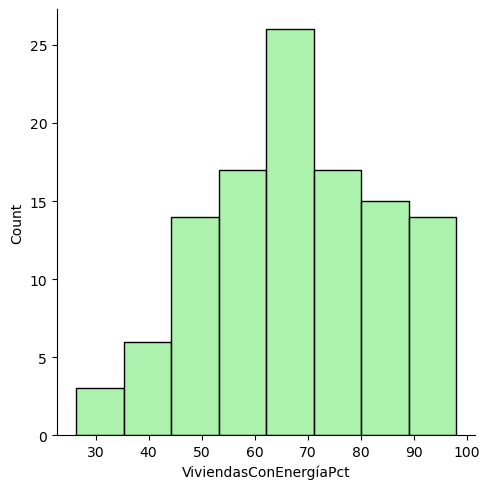

In [26]:
import seaborn as sea

sea.displot(dataBolmap.ViviendasConEnergíaPct, color='lightgreen')

<Axes: >

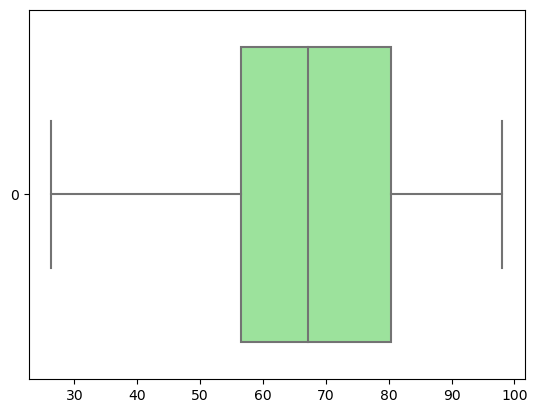

In [27]:
sea.boxplot(dataBolmap.ViviendasConEnergíaPct, color='lightgreen',orient='h')

In [28]:
import mapclassify 
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(dataBolmap['ViviendasConEnergíaPct'], k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(dataBolmap['ViviendasConEnergíaPct'])
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5=mapclassify.Quantiles(dataBolmap['ViviendasConEnergíaPct'],k=K)

# based on similarity, good for multimodal data 
mb5 = mapclassify.MaximumBreaks(dataBolmap['ViviendasConEnergíaPct'], k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(dataBolmap['ViviendasConEnergíaPct']) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(dataBolmap['ViviendasConEnergíaPct'], k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(dataBolmap['ViviendasConEnergíaPct'], k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(dataBolmap['ViviendasConEnergíaPct'], k=K)   

In [29]:
# a frequency table by default
ht

HeadTailBreaks

   Interval      Count
----------------------
[26.31, 67.69] |    56
(67.69, 81.28] |    29
(81.28, 89.70] |    13
(89.70, 93.57] |     7
(93.57, 95.41] |     4
(95.41, 97.15] |     1
(97.15, 97.70] |     1
(97.70, 98.04] |     1

In [30]:
# group label
ht.yb

array([0, 7, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0,
       0, 1, 0, 2, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4,
       2, 1, 1, 4, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 3, 1, 3,
       3, 3, 0, 1, 5, 3, 2, 4, 0, 2, 4, 1, 0, 0, 0, 1, 1, 2, 2, 6, 1, 0,
       0, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 0,
       0, 0])

In [31]:
# labels and counts
np.unique(ht.yb,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([56, 29, 13,  7,  4,  1,  1,  1], dtype=int64))

In [32]:
# ht.yb into a pandas Series

pd.Series(ht.yb).value_counts()

0    56
1    29
2    13
3     7
4     4
7     1
5     1
6     1
dtype: int64

In [33]:
# these are the cuts, but it is not including the min value
ht.bins

array([67.68642857, 81.28142857, 89.69777778, 93.57214286, 95.40857143,
       97.15      , 97.7       , 98.04      ])

In [34]:
# completing the bins
HT_bins=list(ht.bins)
HT_bins.insert(0,dataBolmap.ViviendasConEnergíaPct.min())

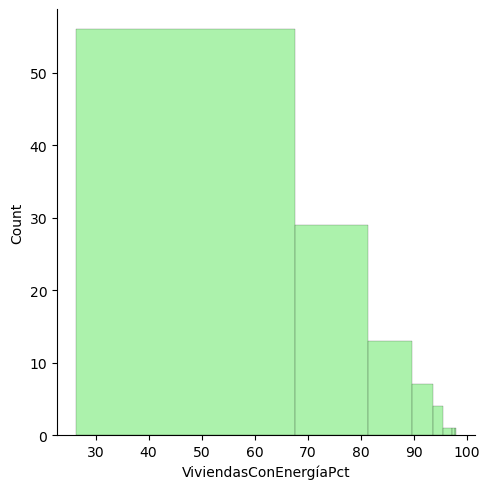

In [35]:
sea.displot(dataBolmap.ViviendasConEnergíaPct, bins=HT_bins,color='lightgreen')

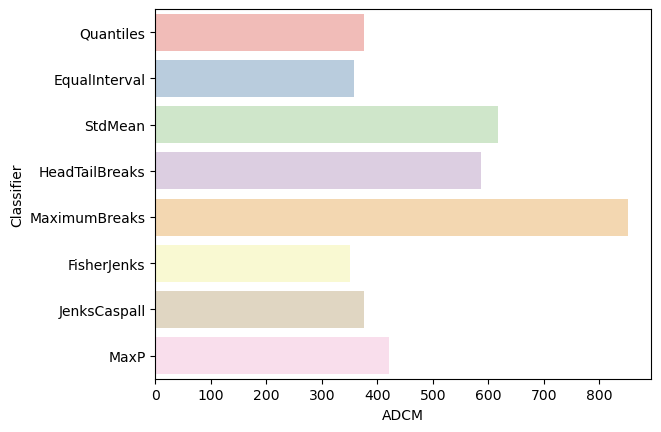

In [36]:
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']
ax = sea.barplot(
    y='Classifier', x='ADCM', data=adcms, palette='Pastel1'
)

In [37]:
# Let's keep the three schemes with the lowest ADCM:

dataBolmap['QU'] = q5.yb 
dataBolmap['EI'] = ei5.yb 
dataBolmap['FJ'] = fj5.yb
dataBolmap['JC'] = jc5.yb

In [38]:
# how many cases per scheme:

class5new = q5,ei5,fj5, jc5
pd.DataFrame(
    {c.name: c.counts for c in class5new},
    index=['Class-{}'.format(i) for i in range(5)]
)

,Quantiles,EqualInterval,FisherJenks,JenksCaspall
Class-0,23,6,7,23
Class-1,22,21,21,22
Class-2,22,35,30,22
Class-3,22,26,30,21
Class-4,23,24,24,24


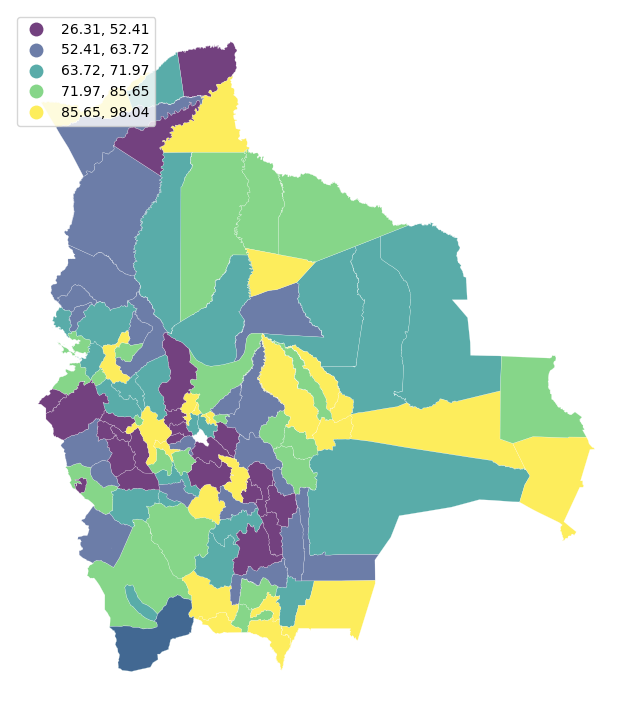

In [39]:
# Plot con los esquemas
# Esquema = Quantiles

import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(9, 9))
dataBolmap.plot(column='ViviendasConEnergíaPct', 
        cmap='viridis',       
        scheme='Quantiles',
        k=5, 
        edgecolor='white', 
        linewidth=0.2, 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

# ojo con Bernandino Bilbao (blanco, 60.51%)

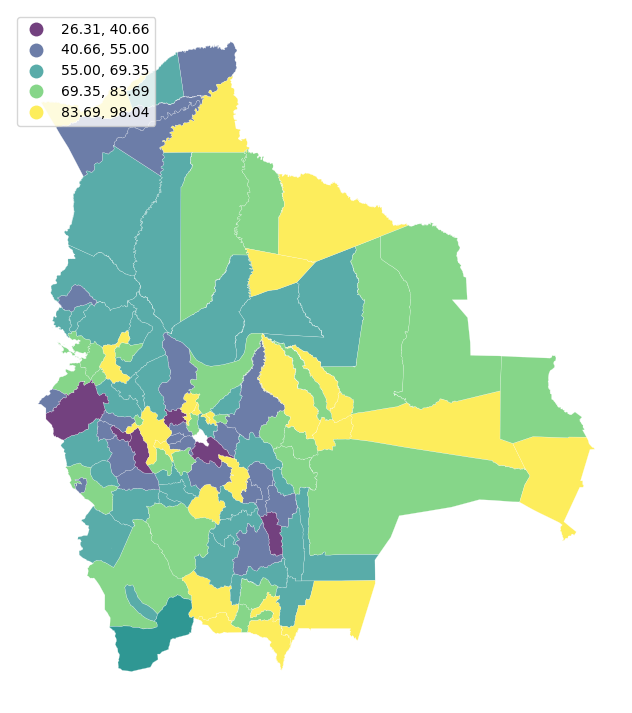

In [40]:
# Plot con los esquemas
# Esquema = EqualInterval

f, ax = plt.subplots(1, figsize=(9, 9))
dataBolmap.plot(column='ViviendasConEnergíaPct', 
        cmap='viridis',       
        scheme='EqualInterval',
        k=5, 
        edgecolor='white', 
        linewidth=0.2, 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

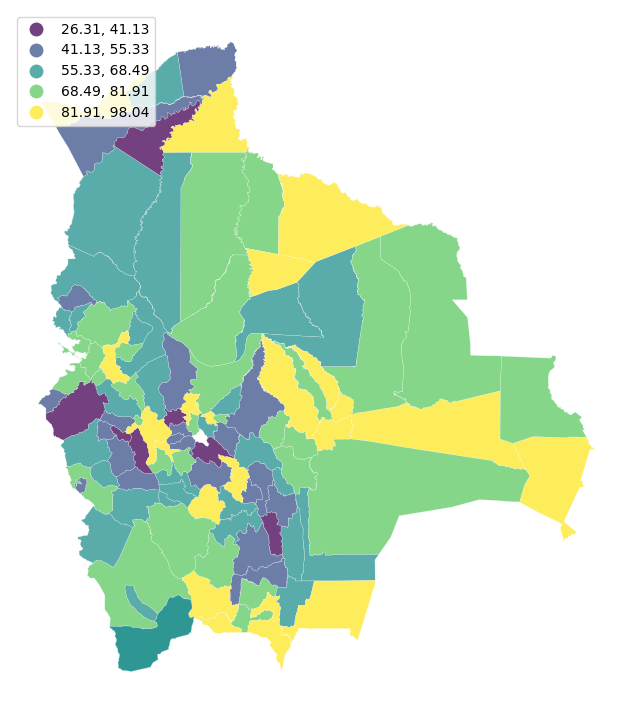

In [41]:
# Plot con los esquemas
# Esquema = FisherJenks

f, ax = plt.subplots(1, figsize=(9, 9))
dataBolmap.plot(column='ViviendasConEnergíaPct', 
        cmap='viridis',       
        scheme='FisherJenks',
        k=5, 
        edgecolor='white', 
        linewidth=0.2, 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

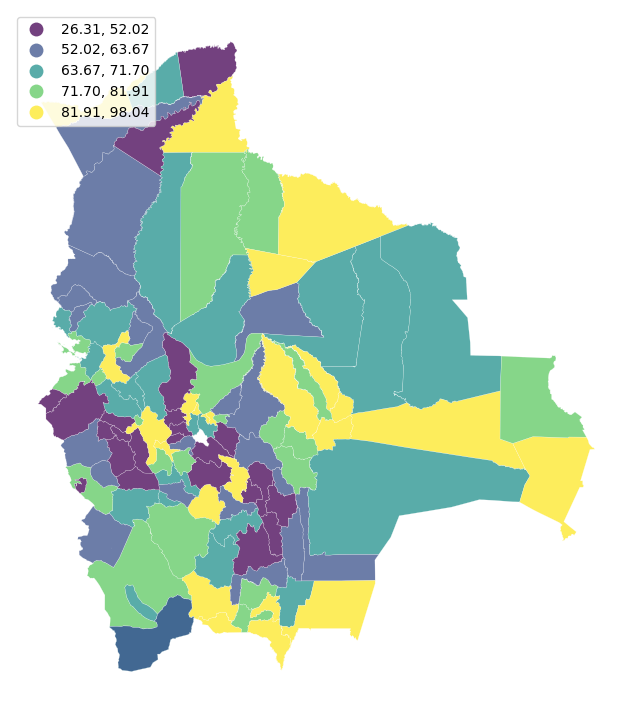

In [42]:
# Plot con los esquemas
# Esquema = JenksCaspall

f, ax = plt.subplots(1, figsize=(9, 9))
dataBolmap.plot(column='ViviendasConEnergíaPct', 
        cmap='viridis',       
        scheme='JenksCaspall',
        k=5, 
        edgecolor='white', 
        linewidth=0.2, 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

In [43]:
dataBolmap.to_file(os.path.join('maps',"dataMapBolivia.gpkg"), layer='provincias', driver="GPKG")

In [44]:
# EJERCICIO: 3

In [45]:
selected_variables = ['ViviendasPropiasPct',
                     'ViviendasConAguaPct', 
                     'ViviendasConEnergíaPct']
dataBolmap[selected_variables].describe()

,ViviendasPropiasPct,ViviendasConAguaPct,ViviendasConEnergíaPct
count,112.000000,112.000000,112.000000
mean,80.577500,51.169071,67.686429
std,11.037082,20.291270,16.736859
min,52.530000,2.060000,26.310000
25%,72.895000,38.272500,56.582500
50%,82.005000,52.775000,67.130000
75%,89.807500,66.320000,80.437500
max,97.180000,92.180000,98.040000


<Axes: >

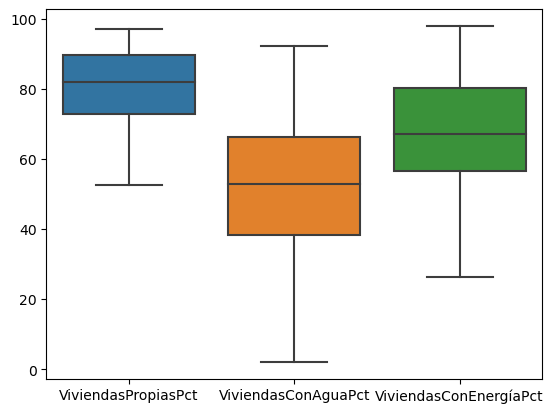

In [46]:
sea.boxplot(dataBolmap[selected_variables])

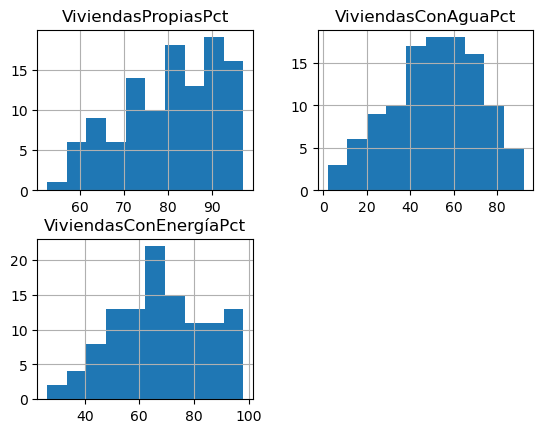

In [47]:
dataBolmap[selected_variables].hist();

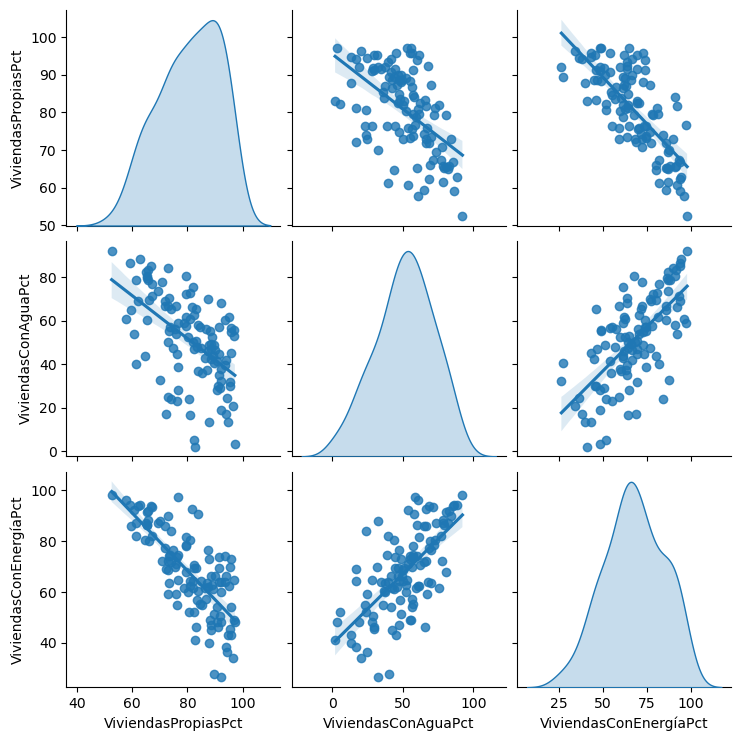

In [48]:
sea.pairplot(
    dataBolmap[selected_variables], kind="reg", diag_kind="kde"
)

<Axes: >

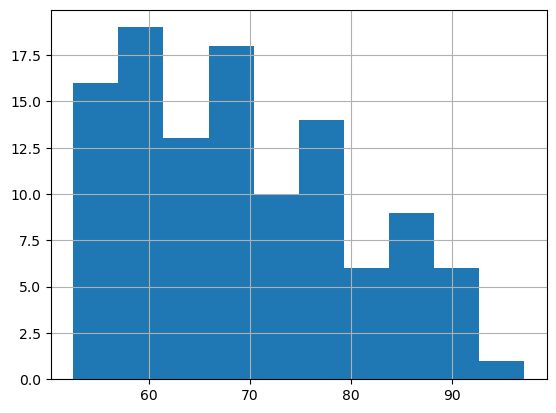

In [49]:
# Finalmente nos damos cuenta de que ViviendasPropiasPct tiene una correlación negativa con los demás (como era de esperar)

reverse=lambda x:abs(x-x.max())+x.min()

dataBolmap['ViviendasNOPropiasPct']=reverse(dataBolmap['ViviendasPropiasPct'])
dataBolmap['ViviendasNOPropiasPct'].hist()

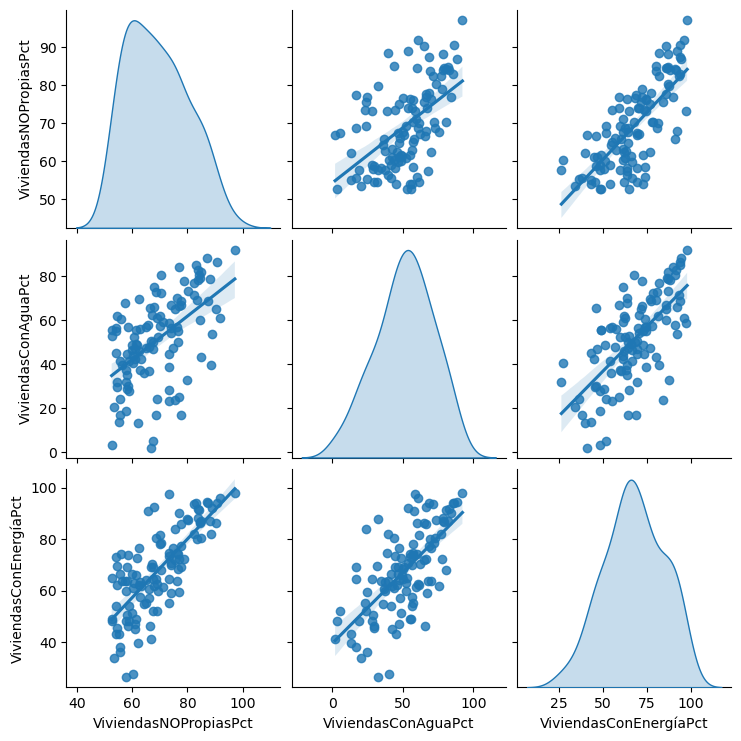

In [50]:
selected_variables_new = ['ViviendasNOPropiasPct',
                     'ViviendasConAguaPct', 
                     'ViviendasConEnergíaPct']
sea.pairplot(
    dataBolmap[selected_variables_new], kind="reg", diag_kind="kde"
)

In [51]:
# BORRAR ESTO BRO, CHEKEAR PARA EL FINAL. SUERTE Y NO TE OLVIDES CTMR
# BORRAR ESTO BRO, CHEKEAR PARA EL FINAL. SUERTE Y NO TE OLVIDES CTMR
# BORRAR ESTO BRO, CHEKEAR PARA EL FINAL. SUERTE Y NO TE OLVIDES CTMR
# BORRAR ESTO BRO, CHEKEAR PARA EL FINAL. SUERTE Y NO TE OLVIDES CTMR
# BORRAR ESTO BRO, CHEKEAR PARA EL FINAL. SUERTE Y NO TE OLVIDES CTMR
# BORRAR ESTO BRO, CHEKEAR PARA EL FINAL. SUERTE Y NO TE OLVIDES CTMR
# BORRAR ESTO BRO, CHEKEAR PARA EL FINAL. SUERTE Y NO TE OLVIDES CTMR
# BORRAR ESTO BRO, CHEKEAR PARA EL FINAL. SUERTE Y NO TE OLVIDES CTMR
# BORRAR ESTO BRO, CHEKEAR PARA EL FINAL. SUERTE Y NO TE OLVIDES CTMR
# BORRAR ESTO BRO, CHEKEAR PARA EL FINAL. SUERTE Y NO TE OLVIDES CTMR

columnsToScale=selected_variables_new


from sklearn.preprocessing import robust_scale as rs
from sklearn.preprocessing import power_transform as pt
from sklearn.preprocessing import quantile_transform as qt

# Debido a una advertencia, hacemos lo siguiente
n_quantiles = 100  # Número deseado de cuantiles

rs_result=rs(dataBolmap[columnsToScale])
pt_result=pt(dataBolmap[columnsToScale])
qt_result=qt(dataBolmap[columnsToScale], n_quantiles=n_quantiles)

<Axes: >

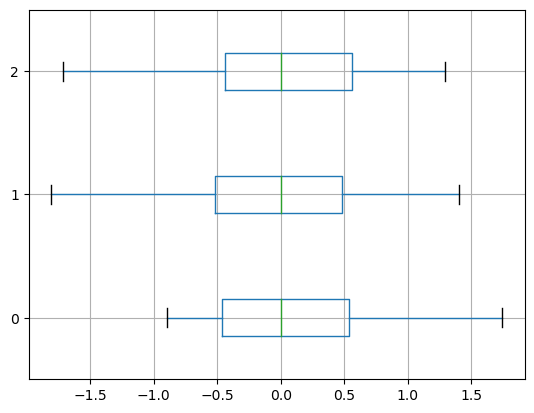

In [52]:
pd.DataFrame(rs_result).boxplot(vert=False)

<Axes: >

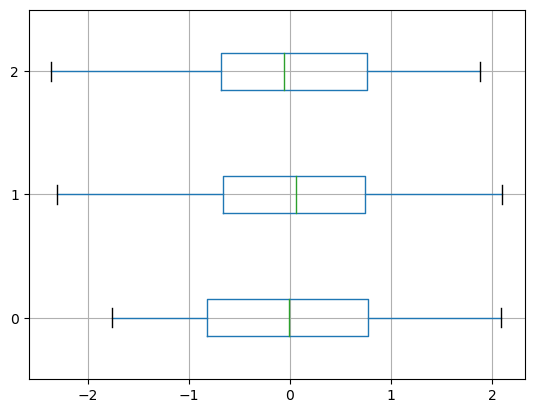

In [53]:
pd.DataFrame(pt_result).boxplot(vert=False)

<Axes: >

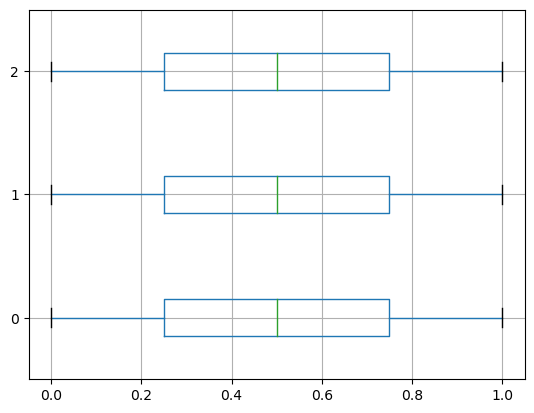

In [54]:
pd.DataFrame(qt_result).boxplot(vert=False)

In [55]:
# Mantendré el qt_result, así que déjame agregar algunas columnas al gdf: CAMBIALO

# new names
selected_variables_new_t=[s+'_t' for s in selected_variables_new ]

# add colunms
dataBolmap[selected_variables_new_t]=qt_result

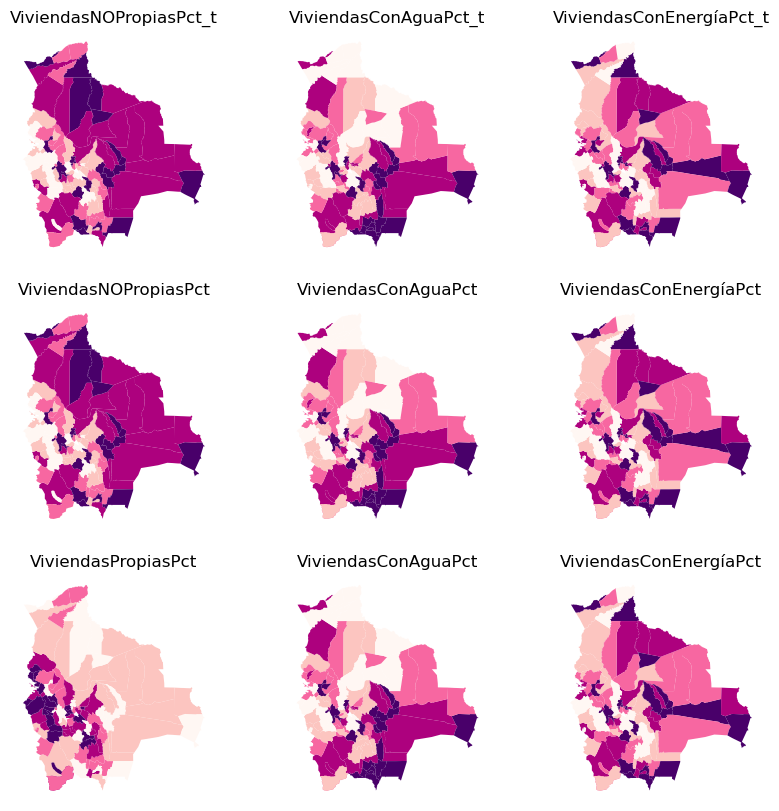

In [56]:
# Grafiquemos los datos que hemos usado (haré el esquema de cuantiles sin evaluación previa):

f, axs = plt.subplots( ncols=3, nrows=3,figsize=(10, 10))
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(selected_variables_new_t + selected_variables_new + selected_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    dataBolmap.plot(
        column=col,
        ax=ax,
        scheme="Quantiles",
        linewidth=0,
        cmap="RdPu",
    )
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

In [57]:
# update

dataBolmap.to_file(os.path.join('maps',"dataMapBolivia.gpkg"), layer='provincias', driver="GPKG")

In [58]:
# EJERCICIO: 4

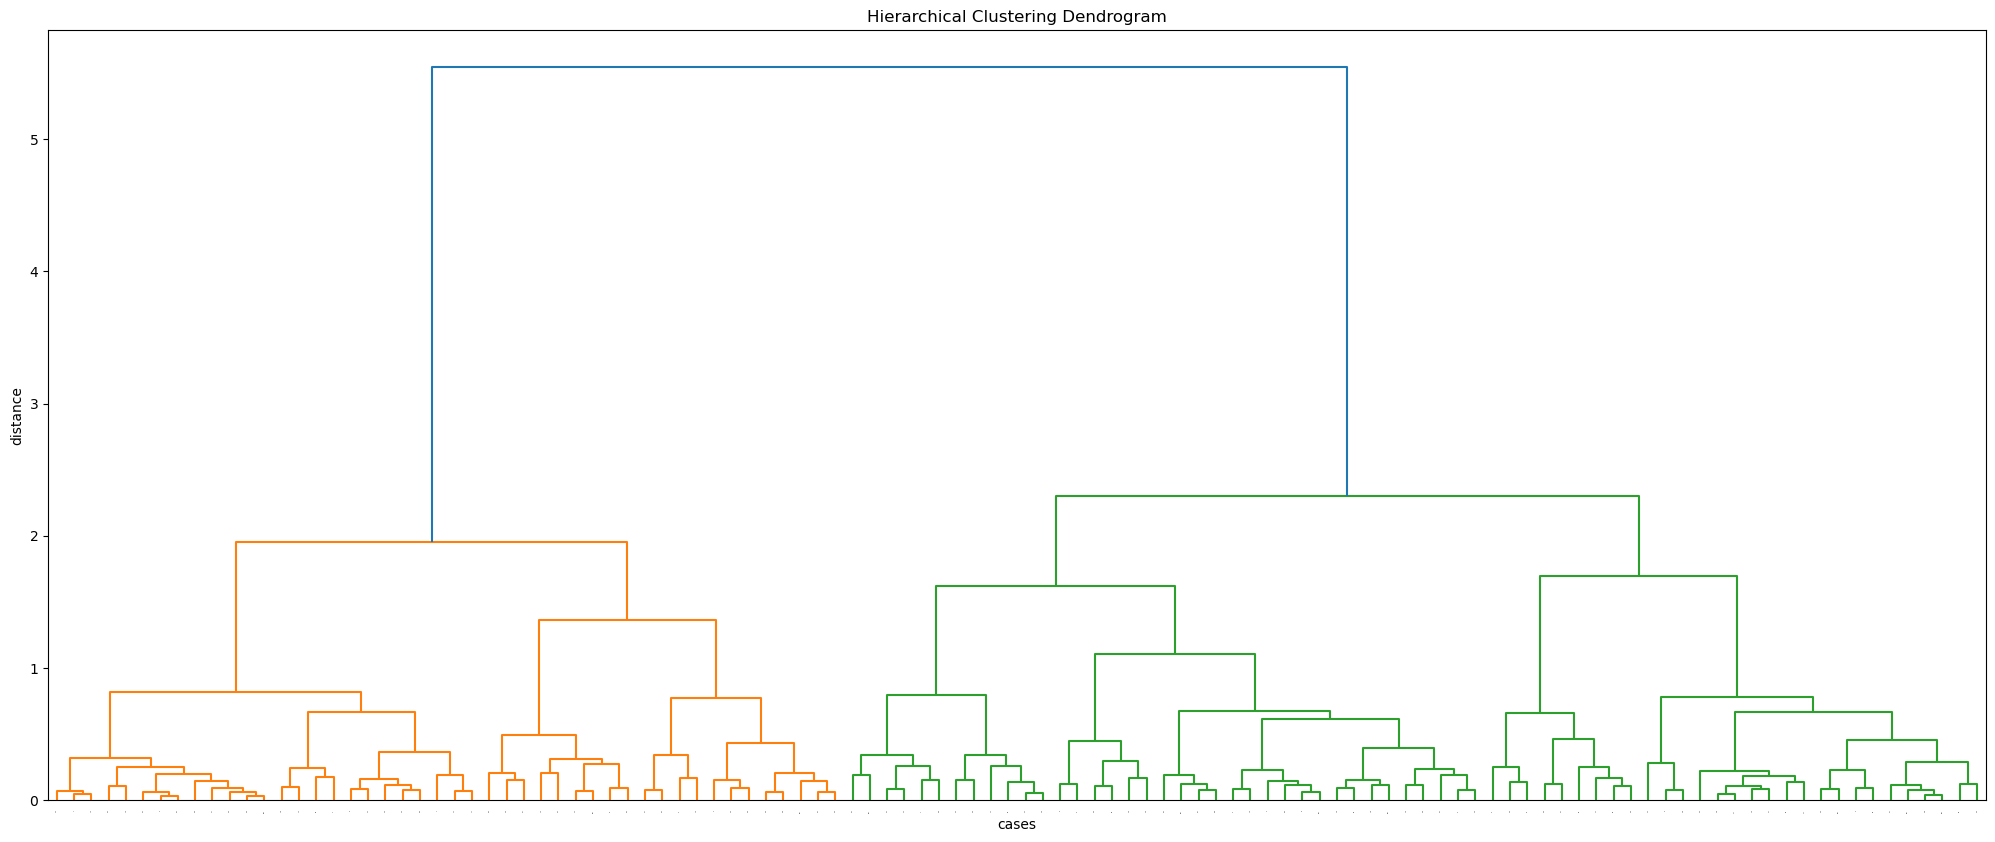

In [59]:
from scipy.cluster import hierarchy as hc


Z = hc.linkage(qt_result, 'ward')
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('cases')
plt.ylabel('distance')
hc.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=1,  # font size for the x axis labels
)
plt.show()

In [60]:
from sklearn.cluster import AgglomerativeClustering as agnes
# Set seed for reproducibility
np.random.seed(12345)
# Initialize the algorithm, requesting 3 clusters
model = agnes(linkage="ward", n_clusters=3).fit(dataBolmap[selected_variables_new_t])
# Assign labels to main data table
dataBolmap["hc_3"] = model.labels_

In [61]:
dataBolmap["hc_3"].value_counts()

0    46
2    37
1    29
Name: hc_3, dtype: int64

In [62]:
dataBolmap.groupby("hc_3")[selected_variables_new].mean()

,ViviendasNOPropiasPct,ViviendasConAguaPct,ViviendasConEnergíaPct
hc_3,,,
0,79.273043,64.900652,83.546304
1,61.102069,28.122276,48.016552
2,62.819459,52.161081,63.385676


In [63]:
# Index db on cluster ID
dataBolmap_long = dataBolmap.set_index("hc_3").copy()
# Keep only variables used for clustering
dataBolmap_long = dataBolmap_long[selected_variables_new]
# Stack column names into a column, obtaining
# a "long" version of the dataset
dataBolmap_long = dataBolmap_long.stack()
# Take indices into proper columns
dataBolmap_long = dataBolmap_long.reset_index()
# Rename column names
dataBolmap_long = dataBolmap_long.rename(
    columns={"level_1": "Attribute", 0: "Values"}
)
# Check out result
dataBolmap_long.head()

,hc_3,Attribute,Values
0,1,ViviendasNOPropiasPct,61.16
1,1,ViviendasConAguaPct,42.39
2,1,ViviendasConEnergíaPct,45.12
3,0,ViviendasNOPropiasPct,97.18
4,0,ViviendasConAguaPct,92.18


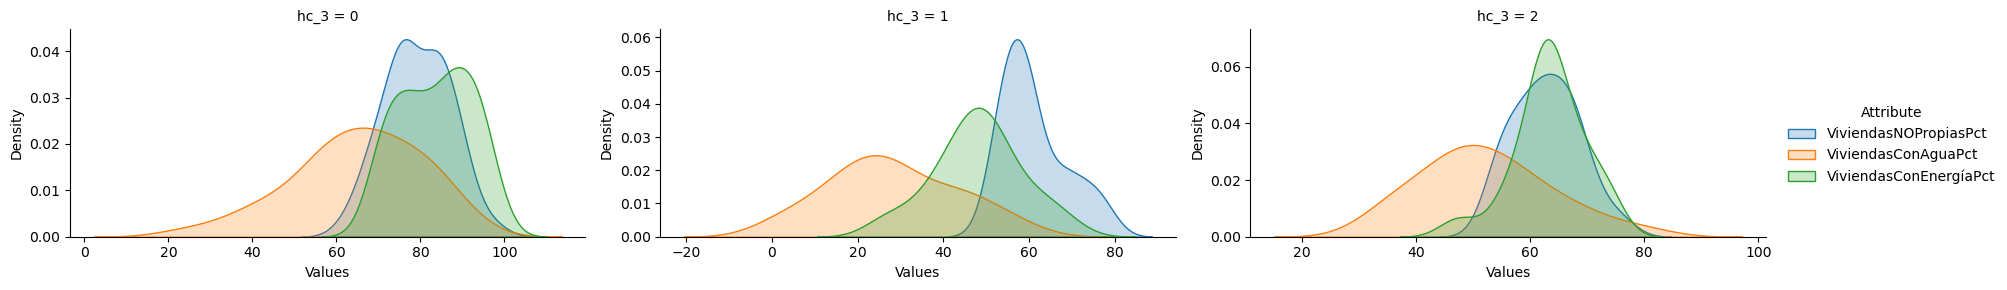

In [64]:
# Setup the facets
facets = sea.FacetGrid(
    data=dataBolmap_long,
    col="hc_3",
    hue="Attribute",
    sharey=False,
    sharex=False,
    aspect=2,
    col_wrap=3,
)
# Build the plot as a `sns.kdeplot`
facets.map(sea.kdeplot, "Values", fill=True).add_legend()

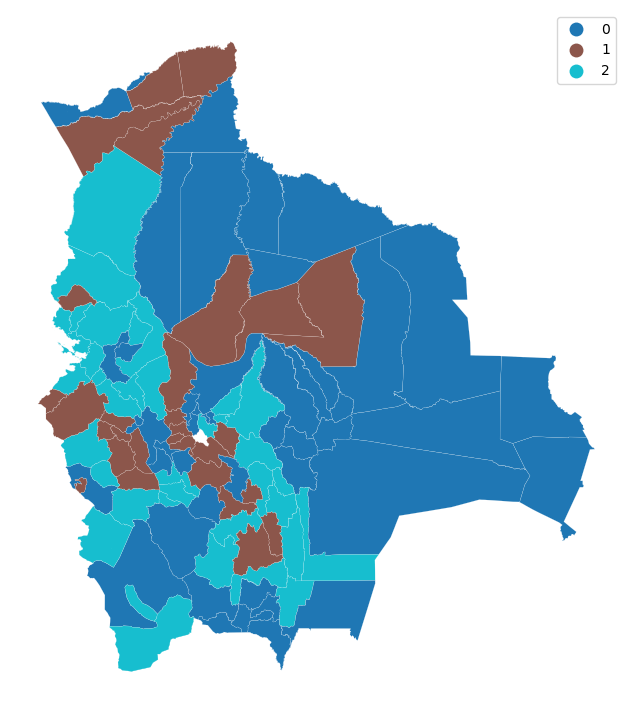

In [65]:
# Set up figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
dataBolmap.plot(
    column="hc_3", categorical=True, legend=True, edgecolor='white', linewidth=0.1, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [66]:
# EJERCICIO: 5

In [70]:
from libpysal.weights import Queen, Rook, KNN

# rook
w_rook = Rook.from_dataframe(dataBolmap) 


In [71]:
# queen
w_queen = Queen.from_dataframe(dataBolmap)

In [ ]:
# k nearest neighbors
w_knn = KNN.from_dataframe(dataBolmap, k=4)

In [ ]:
# first one
dataBolmap.head(1)

In [ ]:
# amount neighbors of that district
w_rook.neighbors[0] 

In [ ]:
# see
base=dataBolmap[dataBolmap.DEPARTAMENTO=="COCHABAMBA"].plot(facecolor="white",edgecolor='black', linewidth=0.5)
dataBolmap.iloc[w_rook.neighbors[0] ,].plot(ax=base,edgecolor='black', linewidth=0.5,facecolor="yellow")
dataBolmap.head(1).plot(ax=base,facecolor="red")

In [ ]:
w_queen.neighbors[0]

In [ ]:
# see
base=dataBolmap[dataBolmap.DEPARTAMENTO=="COCHABAMBA"].plot(facecolor="white",edgecolor='black', linewidth=0.5)
dataBolmap.iloc[w_queen.neighbors[0] ,].plot(ax=base,edgecolor='black', linewidth=0.5,facecolor="yellow")
dataBolmap.head(1).plot(ax=base,facecolor="red")

In [ ]:
w_knn.neighbors[0]

In [ ]:
# see
base=dataBolmap[dataBolmap.DEPARTAMENTO=="COCHABAMBA"].plot(facecolor="white",edgecolor='black', linewidth=0.5)
dataBolmap.iloc[w_knn.neighbors[0] ,].plot(ax=base,edgecolor='black', linewidth=0.5,facecolor="yellow")
dataBolmap.head(1).plot(ax=base,facecolor="red")

In [ ]:
# Let me pay attention to the KNN results:

# all the neighbors by row
w_knn.neighbors

In [ ]:
# the matrix of neighboorhood:

pd.DataFrame(*w_knn.full()).astype(int) # 1 means both are neighbors

In [ ]:
# count of zeros
w_knn.nonzero

In [ ]:
# pct of neighboorhood (density)
w_knn.pct_nonzero

In [ ]:
# a district with NO neighbor?
w_knn.islands

In [ ]:
# EJERCICIO: 6

In [ ]:
# needed for spatial correlation
w_knn.transform = 'R'

In [ ]:
from esda.moran import Moran

# ViviendasPropiasPct ViviendasConAguaPct ViviendasConEnergíaPct

moranViviendasPropiasPct = Moran(dataBolmap['ViviendasPropiasPct'], w_knn)
moranViviendasPropiasPct.I,moranViviendasPropiasPct.p_sim

In [ ]:
from splot.esda import moran_scatterplot

fig, ax = moran_scatterplot(moranViviendasPropiasPct, aspect_equal=True)
ax.set_xlabel('ViviendasPropiasPct_std')
ax.set_ylabel('SpatialLag_ViviendasPropiasPct_std')
plt.show()

In [ ]:
moranViviendasConAguaPct = Moran(dataBolmap['ViviendasConAguaPct'], w_knn)
moranViviendasConAguaPct.I,moranViviendasConAguaPct.p_sim

In [ ]:
fig, ax = moran_scatterplot(moranViviendasConAguaPct, aspect_equal=True)
ax.set_xlabel('ViviendasConAguaPct_std')
ax.set_ylabel('SpatialLag_ViviendasConAguaPct_std')
plt.show()

In [ ]:
moranViviendasConEnergíaPct = Moran(dataBolmap['ViviendasConEnergíaPct'], w_knn)
moranViviendasConEnergíaPct.I,moranViviendasConEnergíaPct.p_sim

In [ ]:
fig, ax = moran_scatterplot(moranViviendasConEnergíaPct, aspect_equal=True)
ax.set_xlabel('ViviendasConEnergíaPct_std')
ax.set_ylabel('SpatialLag_ViviendasConEnergíaPct_std')
plt.show()

In [ ]:
# EJERCICIO: 7

In [ ]:
# The scatterplot with local info
from esda.moran import Moran_Local

# calculate Moran_Local and plot
lisaViviendasConAguaPct = Moran_Local(y=dataBolmap['ViviendasConAguaPct'], w=w_knn,seed=2022)
fig, ax = moran_scatterplot(lisaViviendasConAguaPct,p=0.05)
ax.set_xlabel('ViviendasConAguaPct_std')
ax.set_ylabel('SpatialLag_ViviendasConAguaPct_std')
plt.show()

In [ ]:
# the map with the spots and outliers

from splot.esda import lisa_cluster
f, ax = plt.subplots(1, figsize=(12, 12))
plt.title('Spots and Outliers')
fig = lisa_cluster(lisaViviendasConAguaPct, 
                   dataBolmap,ax=ax,
                   legend_kwds={'loc': 'center left', 
                                'bbox_to_anchor': (0.7, 0.6)})
plt.show()

In [ ]:
# quadrant
lisaViviendasConAguaPct.q

In [ ]:
# significance
lisaViviendasConAguaPct.p_sim

In [ ]:
# quadrant: 1 HH,  2 LH,  3 LL,  4 HL
pd.Series(lisaViviendasConAguaPct.q).value_counts()

In [ ]:
dataBolmap['ViviendasConAguaPct_quadrant']=[l if p <0.05 else 0 for l,p in zip(lisaViviendasConAguaPct.q,lisaViviendasConAguaPct.p_sim)  ]
dataBolmap['ViviendasConAguaPct_quadrant'].value_counts()

In [ ]:
labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']

dataBolmap['ViviendasConAguaPct_quadrant_names']=[labels[i] for i in dataBolmap['ViviendasConAguaPct_quadrant']]

dataBolmap['ViviendasConAguaPct_quadrant_names'].value_counts()

In [ ]:
from matplotlib import colors
myColMap = colors.ListedColormap([ 'ghostwhite', 'red', 'green', 'black','orange'])



# Set up figure and ax
f, ax = plt.subplots(1, figsize=(12,12))
# Plot unique values choropleth including
# a legend and with no boundary lines

plt.title('Spots and Outliers')

dataBolmap.plot(column='ViviendasConAguaPct_quadrant_names', 
                categorical=True,
                cmap=myColMap,
                linewidth=0.1, 
                edgecolor='black',
                legend=True,
                legend_kwds={'loc': 'center left', 
                             'bbox_to_anchor': (0.7, 0.6)},
                ax=ax)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [ ]:
# final update
dataBolmap.to_file(os.path.join('maps',"dataMapBolivia.gpkg"), layer='provincias', driver="GPKG")

In [ ]:
# FALTA ACOMODAR CÓDIGOS, PERO YA ESTÁ <3